In [35]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
pd.options.display.max_columns = None
InteractiveShell.ast_node_interactivity = "all"

test_path = '/home/jevgenji/Desktop/filtered_wget_0/kplr001026957_q1_q17_dr25_tce_01_dvt_lc.tbl'

In [36]:
t = Table.read(test_path, format='ipac')

In [16]:
t.meta

OrderedDict([('comments',
              ['Kepler Mission FITS Header Keywords',
               'NASA Exoplanet Archive Table Header Keywords',
               'ORBITALPERIOD and TRANSITEPOCH in BKJD (BJD - 2454833)',
               'TIME:  BKJD (BJD - 2454833)',
               'TIMECORR:  The barycentric correction and the time slice correction applied to the time reported by the Kepler spacecraft.',
               'CADENCENO: Cadence number',
               'PHASE: The phase using the period and epoch identified in the keywords, spanning from -1/4 P to 3/4 P. The transit occurs at zero P.',
               'LC_INIT: The initial light curve which has been quarter-stitched, harmonic-removed and has a mean of zero.',
               'LC_INIT_ERR:  The estimated uncertainty on LC_INIT.',
               'LC_WHITE: LC_INIT with the whitening filter applied.  This is the light curve searched by TPS to find this TCE.',
               'LC_DETREND: The quarter-stitched, median detrended, relative-

In [37]:
t.meta['keywords']['KEPLERID']

{'value': 1026957}

In [38]:
t.meta['keywords']['TCEPLANETNUM']

{'value': 1}

In [39]:
t.meta['keywords']['ORBITALPERIOD']

{'value': 21.7613}

In [40]:
t.meta['keywords']['TRANSITEPOCH']

{'value': 144.779}

In [41]:
t_df = t.to_pandas()

In [43]:
display(t_df.head(3))

,TIME,TIMECORR,CADENCENO,PHASE,LC_INIT,LC_INIT_ERR,LC_WHITE,LC_DETREND,MODEL_INIT,MODEL_WHITE
0,131.512698,-0.001704,1105.0,8.495052,0.000772,0.000090,3.450936,0.000585,0.0,-0.000141
1,131.533132,-0.001705,1106.0,8.515487,0.000484,0.000091,1.359991,0.000174,0.0,-0.000141
2,131.553567,-0.001706,1107.0,8.535921,0.000534,0.000091,1.462187,0.000152,0.0,-0.000142


In [45]:
foldTimes = t_df.TIME.values / t.meta['keywords']['ORBITALPERIOD']['value']   # divide by period to convert to phase
foldTimes = foldTimes % 1

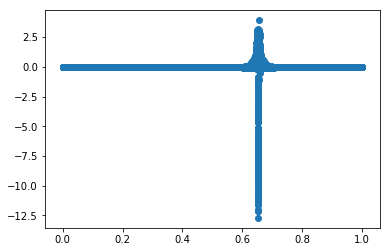

In [49]:
plt.scatter(foldTimes, t_df.MODEL_WHITE.values)
plt.show()

In [50]:
foldTimes

array([ 0.04342102,  0.04436006,  0.04529909, ...,  0.10963163,
        0.11057066,  0.1115097 ])